In [ ]:
!pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-4zea76y8
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-4zea76y8
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done


# **Download the Dataset and Data analysis**

In [ ]:
import os
from pathlib import Path
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install -q kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mariamtarekmostafa","key":"d50c38f62c517e8a6d8c749504f8b8fa"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          36491       1019  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           5535        147  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           7367        156  1.0              
mohithsairamreddy/salary-data 

In [ ]:
!kaggle datasets download -d lhanhsin/vizwiz

100% 17.5G/17.5G [03:05<00:00, 166MB/s]
100% 17.5G/17.5G [03:05<00:00, 101MB/s]


In [ ]:
!unzip vizwiz.zip

Streaming output truncated to the last 5000 lines.
  inflating: val/val/VizWiz_val_00002750.jpg  
  inflating: val/val/VizWiz_val_00002751.jpg  
  inflating: val/val/VizWiz_val_00002752.jpg  
  inflating: val/val/VizWiz_val_00002753.jpg  
  inflating: val/val/VizWiz_val_00002754.jpg  
  inflating: val/val/VizWiz_val_00002755.jpg  
  inflating: val/val/VizWiz_val_00002756.jpg  
  inflating: val/val/VizWiz_val_00002757.jpg  
  inflating: val/val/VizWiz_val_00002758.jpg  
  inflating: val/val/VizWiz_val_00002759.jpg  
  inflating: val/val/VizWiz_val_00002760.jpg  
  inflating: val/val/VizWiz_val_00002761.jpg  
  inflating: val/val/VizWiz_val_00002762.jpg  
  inflating: val/val/VizWiz_val_00002763.jpg  
  inflating: val/val/VizWiz_val_00002764.jpg  
  inflating: val/val/VizWiz_val_00002765.jpg  
  inflating: val/val/VizWiz_val_00002766.jpg  
  inflating: val/val/VizWiz_val_00002767.jpg  
  inflating: val/val/VizWiz_val_00002768.jpg  
  inflating: val/val/VizWiz_val_00002769.jpg  
  inflati

In [ ]:
import json
import datetime
from collections import Counter
import pandas as pd
train_path_j = open ('/content/Annotations/Annotations/train.json', "r")
val_path_j=open('/content/Annotations/Annotations/val.json',"r")

# Reading from file
train_json = json.loads(train_path_j.read())
train_dataset=pd.json_normalize(train_json)
val_json = json.loads(val_path_j.read())
val_dataset=pd.json_normalize(val_json)


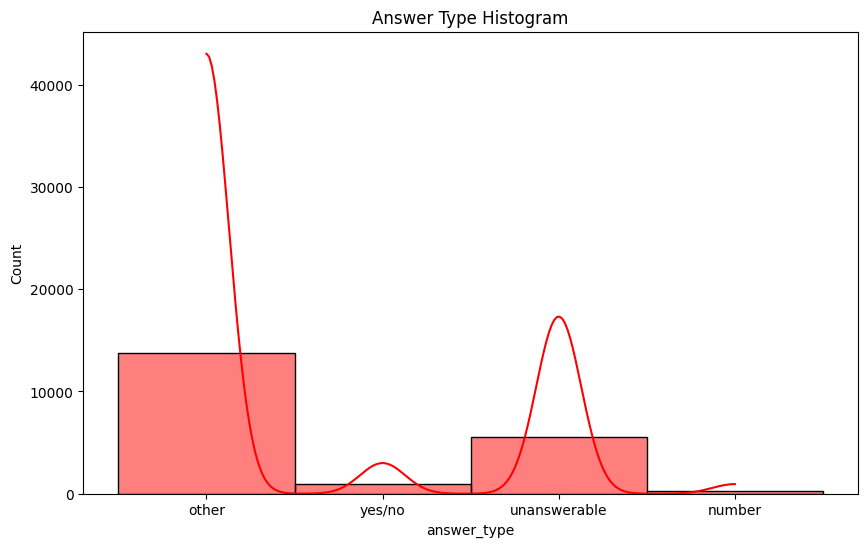

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sea
plt.figure(figsize=(10, 6))
sea.histplot(data=train_dataset, x='answer_type', bins=10, kde=True,color='red')
plt.title('Answer Type Histogram')  # Update the title accordingly
plt.xlabel('answer_type')
plt.ylabel('Count')
plt.show()

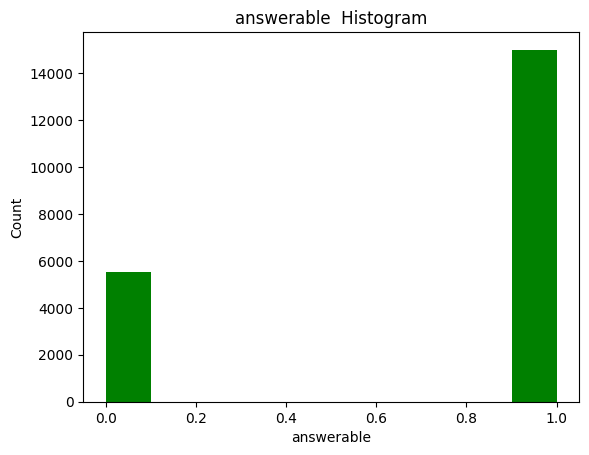

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train_dataset['answerable'],color='green')
plt.title('answerable  Histogram')  # Update the title accordingly
plt.xlabel('answerable')
plt.ylabel('Count')
plt.show()

**choose best Answer**

In [ ]:

answers_col_train=train_dataset['answers']
answers_col_val=val_dataset['answers']

confidence_level = {
  'no': 0,
  'maybe': 1,
  'yes': 2
}

In [ ]:
#iterate over each row
def find_best_answer(answers_col):
  counter_questions=0
  for question_answers in answers_col :
    redundant_answer=[]
    sumofweight=[]
    #iterate over each answer in the row
    counter_answers=0
    for answer in question_answers:
      if (question_answers[counter_answers]['answer'] in redundant_answer):
        #which means its weight was calculated previously
        index=redundant_answer.index(question_answers[counter_answers]['answer'] )

        sumofweight[index] += confidence_level[(question_answers[counter_answers]['answer_confidence'])]
      else :
        redundant_answer.append(question_answers[counter_answers]['answer'])

        sumofweight.append( confidence_level[(question_answers[counter_answers]['answer_confidence'])])

      counter_answers=counter_answers+1

    index=sumofweight.index(max(sumofweight))
    answers_col[counter_questions ]=redundant_answer[index]

    counter_questions=counter_questions+1

find_best_answer(answers_col_train)
find_best_answer(answers_col_val)


<ipython-input-13-4971be9b84f4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answers_col[counter_questions ]=redundant_answer[index]


In [ ]:
display(train_dataset)
display(val_dataset)

,image,question,answers,answer_type,answerable
0,VizWiz_train_00000000.jpg,What's the name of this product?,basil leaves,other,1
1,VizWiz_train_00000001.jpg,Can you tell me what is in this can please?,coca cola,other,1
2,VizWiz_train_00000002.jpg,Is this enchilada sauce or is this tomatoes? ...,tomatoes,other,1
3,VizWiz_train_00000003.jpg,What is the captcha on this screenshot?,t36m,other,1
4,VizWiz_train_00000004.jpg,What is this item?,solar garden light,other,1
...,...,...,...,...,...
20518,VizWiz_train_00023949.jpg,What's the color for this laptop?,black,other,1
20519,VizWiz_train_00023950.jpg,"(inaudible) can you see it? If so, then tell m...",unanswerable,other,1
20520,VizWiz_train_00023951.jpg,What are the three numbers I have to type?,unsuitable image,unanswerable,0
20521,VizWiz_train_00023952.jpg,Is it a box?,no,yes/no,1


,image,question,answers,answer_type,answerable
0,VizWiz_val_00000000.jpg,Ok. There is another picture I hope it is a be...,unanswerable,unanswerable,0
1,VizWiz_val_00000001.jpg,Can you tell me what this medicine is please?,night time,other,1
2,VizWiz_val_00000002.jpg,What is the title of this book?,dog years,other,1
3,VizWiz_val_00000003.jpg,Which one is the blue one?,right,other,1
4,VizWiz_val_00000004.jpg,What does the arrow say?,unanswerable,unanswerable,0
...,...,...,...,...,...
4314,VizWiz_val_00004314.jpg,what is this?,salad dressing,other,1
4315,VizWiz_val_00004315.jpg,Is this modern?,unsuitable,unanswerable,0
4316,VizWiz_val_00004316.jpg,I need to buy this battery for my cordless pho...,unanswerable,unanswerable,0
4317,VizWiz_val_00004317.jpg,What kind of mix is this?,cake,other,1


In [ ]:
concated_data_df = pd.concat((train_dataset,val_dataset), axis =0,ignore_index=True)
print(concated_data_df.shape)

(24842, 5)


In [ ]:
display(concated_data_df)

,image,question,answers,answer_type,answerable
0,VizWiz_train_00000000.jpg,What's the name of this product?,basil leaves,other,1
1,VizWiz_train_00000001.jpg,Can you tell me what is in this can please?,coca cola,other,1
2,VizWiz_train_00000002.jpg,Is this enchilada sauce or is this tomatoes? ...,tomatoes,other,1
3,VizWiz_train_00000003.jpg,What is the captcha on this screenshot?,t36m,other,1
4,VizWiz_train_00000004.jpg,What is this item?,solar garden light,other,1
...,...,...,...,...,...
24837,VizWiz_val_00004314.jpg,what is this?,salad dressing,other,1
24838,VizWiz_val_00004315.jpg,Is this modern?,unsuitable,unanswerable,0
24839,VizWiz_val_00004316.jpg,I need to buy this battery for my cordless pho...,unanswerable,unanswerable,0
24840,VizWiz_val_00004317.jpg,What kind of mix is this?,cake,other,1


**Encode labels in Datasets**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
concated_data_df['answers'] = lb.fit_transform(concated_data_df['answers'])
ans_type_lb = LabelEncoder()
concated_data_df['answer_type']= lb.fit_transform(concated_data_df['answer_type'])

In [ ]:
display(concated_data_df)

,image,question,answers,answer_type,answerable
0,VizWiz_train_00000000.jpg,What's the name of this product?,794,1,1
1,VizWiz_train_00000001.jpg,Can you tell me what is in this can please?,1797,1,1
2,VizWiz_train_00000002.jpg,Is this enchilada sauce or is this tomatoes? ...,6082,1,1
3,VizWiz_train_00000003.jpg,What is the captcha on this screenshot?,5877,1,1
4,VizWiz_train_00000004.jpg,What is this item?,5555,1,1
...,...,...,...,...,...
24837,VizWiz_val_00004314.jpg,what is this?,5222,1,1
24838,VizWiz_val_00004315.jpg,Is this modern?,6245,2,0
24839,VizWiz_val_00004316.jpg,I need to buy this battery for my cordless pho...,6235,2,0
24840,VizWiz_val_00004317.jpg,What kind of mix is this?,1317,1,1


In [ ]:
val_dataset = concated_data_df.iloc[20523:].reset_index(drop=True)
print(val_dataset.shape)

(4319, 5)


**Split Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
indices = np.arange(20523)

# Perform train-test split
trainng, testing = train_test_split(indices, test_size=0.05, random_state=42, stratify=concated_data_df.iloc[:20523]['answer_type'])

In [ ]:
train_indices_aug = trainng + 20523
train = concated_data_df.iloc[trainng]
train_data_set = train.reset_index(drop=True)
test = concated_data_df.iloc[testing]
test_data_set = test.reset_index(drop=True)

In [ ]:
print(train_data_set.shape)
print(test_data_set.shape)

(19496, 5)
(1027, 5)


In [ ]:
display(train_data_set)
display(test_data_set)

,image,question,answers,answer_type,answerable
0,VizWiz_train_00014709.jpg,What is this?,6123,1,1
1,VizWiz_train_00009566.jpg,What product is this? Is it moisturizing lotion?,6672,1,1
2,VizWiz_train_00011322.jpg,What's in this box?,6235,2,0
3,VizWiz_train_00005267.jpg,What is in this kitchen? In this room?,2611,1,1
4,VizWiz_train_00009281.jpg,Is this shampoo or conditioner?,5351,1,1
...,...,...,...,...,...
19491,VizWiz_train_00015453.jpg,What number is shown?,241,0,1
19492,VizWiz_train_00019967.jpg,Where is B?,3773,1,1
19493,VizWiz_train_00017226.jpg,What kind of tea is this?,4402,1,1
19494,VizWiz_train_00016495.jpg,What is this?,1718,1,1


,image,question,answers,answer_type,answerable
0,VizWiz_train_00023579.jpg,Sometimes they're able to and sometimes they a...,6235,2,0
1,VizWiz_train_00001384.jpg,What is the title of this book? Thank you,6235,2,0
2,VizWiz_train_00015850.jpg,What color is this?,4697,1,1
3,VizWiz_train_00010122.jpg,What's being displayed on my screen?,416,1,1
4,VizWiz_train_00016891.jpg,What is this item?,2991,1,1
...,...,...,...,...,...
1022,VizWiz_train_00010922.jpg,What flavor of kool aid is this?,6178,1,1
1023,VizWiz_train_00017572.jpg,What is this item?,5042,1,1
1024,VizWiz_train_00016464.jpg,What is the name of this book? Thank you.,3755,1,1
1025,VizWiz_train_00001537.jpg,What is this?,6571,1,1


In [ ]:
#get 0.05 of training data as validation
trainng_data_set, validation_oftraining = train_test_split(train_data_set, test_size=0.05,
                                                           random_state=42, stratify=train_data_set['answer_type'])

In [ ]:
print(trainng_data_set.shape)
print(validation_oftraining.shape)

(18521, 5)
(975, 5)


In [ ]:
display(trainng_data_set)
display(validation_oftraining)

,image,question,answers,answer_type,answerable
15571,VizWiz_train_00012636.jpg,"Here are the 2 shirt again, little bit farther...",6672,3,1
10129,VizWiz_train_00003989.jpg,What is the expiry date on this yogurt?,66,1,1
13526,VizWiz_train_00004001.jpg,What type of chicken is this?,1187,1,1
17752,VizWiz_train_00002427.jpg,What is it?,3490,1,1
705,VizWiz_train_00003197.jpg,Does this box have instructions for 8X8 pan si...,6235,2,0
...,...,...,...,...,...
18644,VizWiz_train_00002411.jpg,What's the title of this CD?,5964,1,1
7807,VizWiz_train_00007028.jpg,Is this a decongestant?,6235,2,0
14754,VizWiz_train_00001758.jpg,What the temperature on this silly thermostat?,438,0,1
2495,VizWiz_train_00017418.jpg,what color is this shirt?,5777,1,1


,image,question,answers,answer_type,answerable
949,VizWiz_train_00007205.jpg,What is this can?,945,1,1
7381,VizWiz_train_00018189.jpg,What is this spice?,5302,1,1
8319,VizWiz_train_00006626.jpg,What brand of gum and what flavor is this?,2404,1,1
14639,VizWiz_train_00012962.jpg,What flower is this?,4697,1,1
18361,VizWiz_train_00017392.jpg,What's the number on the top left corner?,378,0,1
...,...,...,...,...,...
10100,VizWiz_train_00018527.jpg,What brand of lasagna is this and if you can s...,6245,2,0
2020,VizWiz_train_00019799.jpg,What book is this?,3158,1,1
9815,VizWiz_train_00012910.jpg,What movie is this poster for?,495,1,1
14224,VizWiz_train_00019611.jpg,There's a guy with a pizza hat on.,6235,2,0


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import json
import torch
from collections import Counter
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import clip

In [ ]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the CLIP model and preprocessing function
model, preprocess = clip.load("ViT-L/14", device=device)

100%|███████████████████████████████████████| 890M/890M [00:11<00:00, 79.7MiB/s]


In [ ]:
print(f'Using {device}')

Using cuda


In [ ]:
##Clip encoding

encodings = []
for img, question in tqdm(zip(train_dataset['image'], train_dataset['question'])):
    prefix = "train" if "train" in img else "test" if "test" in img else "val"
    image_path = f'/content/{prefix}/{prefix}/{img}'
    if "train" in img:
        image = preprocess(Image.open(image_path).rotate(90)).unsqueeze(0).to(device)
    else:
        image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)


    text = clip.tokenize(question).to(device)

    with torch.no_grad():
        encodings.append(torch.cat([model.encode_image(image), model.encode_text(text)], dim=-1))
torch.save(encodings,"data-encoded.pt")

20523it [32:22, 10.57it/s]


# Building the Model

In [ ]:
#Model Dimensions

embedding_size = 768
classes = len(np.unique(lb.classes_))
aux_classes = len(np.unique(train_data_set['answer_type']))
BATCH_SIZE = 64


In [ ]:
encod = [torch.load('/content/data-encoded.pt')]


In [ ]:
class SpecificData(Dataset):
    def __init__(self, indices, answers, types):
        if len(indices) != len(answers) or len(indices) != len(types):
            raise ValueError("Indices, answers, and types must have the same length")

        self.indices = indices
        self.answers = answers
        self.types = types

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, index):
        if len(self.indices) <= 20523:
                return encod[self.indices[index]].float() , torch.tensor(int(self.answers[index])), torch.tensor(int(self.types[index]))

        return encod[self.indices[index]].float() , torch.tensor(int(self.answers[index % (self.length/2)])), torch.tensor(int(self.types[index % (self.length/2)]))


In [ ]:
train_indices_combined = np.concatenate((trainng, train_indices_aug))
train_answers_combined = np.concatenate((train_data_set['answers'], train_data_set['answers']))
train_answer_types_combined = np.concatenate((train_data_set['answer_type'], train_data_set['answer_type']))

#val_indices = np.arange(encod.shape[0] - 4319, encod.shape[0])
#val_answers = val_dataset['answers']
#val_answer_types = val_dataset['answer_type']

train_indices = np.arange(len(train_data_set['answers']))
val_indices = np.arange(len(val_dataset['answers']))

if len(train_indices) > len(train_data_set['answers']):
    train_indices = train_indices[:len(train_data_set['answer'])]
if len(val_indices) > len(val_dataset['answer']):
    val_indices = val_indices[:len(val_dataset['answer'])]

train_dataset = SpecificData(train_indices, train_data_set['answers'], train_data_set['answer_type'])
val_dataset = SpecificData(val_indices, val_dataset['answer'], val_dataset['answer_type'])


train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.ln1 = nn.LayerNorm(embedding_size * 2)
        self.dp1 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(embedding_size * 2, 512)
        self.ln2 = nn.LayerNorm(512)
        self.dp2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, classes)
        self.fc_aux = nn.Linear(512, aux_classes)
        self.lnaux = nn.LayerNorm(aux_classes)
        self.dpaux = nn.Dropout(0.5)
        self.fc_gate = nn.Linear(aux_classes, classes)
        self.act_gate = nn.Sigmoid()

    def forward(self, x):
        x = self.ln1(x)
        x = self.dp1(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.ln2(x)
        x = self.dp2(x)
        aux = self.fc_aux(x)
        vqa = self.fc2(x)
        output = vqa * self.act_gate(self.fc_gate(aux))
        return output, aux

In [ ]:
def run_model(model, dataloader, val_loader, optimizer, train=True):
    if train:
        model.train()

    loss = nn.CrossEntropyLoss()

    total_loss = 0.0
    total_correct = 0
    total_samples = 0

    total_correct_ty = 0
    total_samples_ty = 0

    for data, ans, ans_type in tqdm(dataloader):
        data = data.to(device)
        ans = ans.to(device)
        ans_type = ans_type.to(device)
        optimizer.zero_grad()
        output, aux = model(data)

        loss_ans = loss(output, ans)
        loss_type = loss(aux, ans_type)
        loss_combined = loss_ans + loss_type
        total_loss += loss_combined.item()
        loss_combined.backward()
        optimizer.step()

        # Answer Accuracy
        _, predicted_labels = torch.max(output, dim=1)
        correct = (predicted_labels == ans).sum().item()
        total_correct += correct
        total_samples += ans.size(0)
        train_accuracy = total_correct / total_samples

        # Type Accuracy
        _, predicted_labels_ty = torch.max(aux, dim=1)
        correct_ty = (predicted_labels_ty == ans_type).sum().item()
        total_correct_ty += correct_ty
        total_samples_ty += ans_type.size(0)
        train_accuracy_ty = total_correct_ty / total_samples_ty

    total_train_accuracy = (train_accuracy + train_accuracy_ty) / 2

    if val_loader is not None:
        model.eval()

        # Initialize validation-specific variables
        val_loss = 0.0
        total_correct_val = 0
        total_samples_val = 0

        total_correct_val_ty = 0
        total_samples_val_ty = 0

        # Disable gradient calculation
        with torch.no_grad():
            # Iterate over the validation data
            for data, ans, ans_type in val_loader:
                data = data.to(device)
                ans = ans.to(device)
                ans_type = ans_type.to(device)

                # Forward pass
                output, aux = model(data)

                # Compute the loss
                loss_ans = loss(output, ans)
                loss_type = loss(aux, ans_type)
                loss_combined = loss_ans + loss_type
                val_loss += loss_combined.item()

                # Update validation metrics
                _, val_predicted = torch.max(output, dim=1)
                correct_val = (val_predicted == ans).sum().item()
                total_correct_val += correct_val
                total_samples_val += ans.size(0)
                val_accuracy = total_correct_val / total_samples_val

                _, val_predicted_ty = torch.max(aux, dim=1)
                correct_val_ty = (val_predicted_ty == ans_type).sum().item()
                total_correct_val_ty += correct_val_ty
                total_samples_val_ty += ans_type.size(0)
                val_accuracy_ty = total_correct_val_ty / total_samples_val_ty

        total_val_accuracy = (val_accuracy + val_accuracy_ty) / 2

    train_loss = total_loss / len(dataloader)
    val_loss = val_loss / len(val_loader)

    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    print(f"Train ANS ACC: {train_accuracy * 100:.2f}% | VAL ANS ACC: {val_accuracy * 100:.2f}%")
    print(f"Train TYPE ACC: {train_accuracy_ty * 100:.2f}% | VAL TYPE ACC: {val_accuracy_ty * 100:.2f}%")
    print(f"AVG Train ACC: {total_train_accuracy * 100:.2f}% | AVG Val ACC: {total_val_accuracy * 100:.2f}%")

    return train_loss, val_loss

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model().to(device)
model = nn.DataParallel(model)

epochs = 125
training_loss = []
val_loss = []

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.1, threshold=1e-6)

early_stopping_patience = 15
best_val_loss = float('inf')
epochs_without_improvement = 0

for epoch in range(epochs):
    print(f'Epoch [{epoch+1}/{epochs}] | Learning Rate: {optimizer.param_groups[0]["lr"]:.6f}')
    tr_loss, vl_loss = run_model(model, train_dataloader, val_dataloader, optimizer)
    training_loss.append(tr_loss)
    val_loss.append(vl_loss)

    scheduler.step(vl_loss)

    # Check if validation loss has improved
    if vl_loss < best_val_loss:
        best_val_loss = vl_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    # Check if early stopping criteria met
    if epochs_without_improvement >= early_stopping_patience:
        print(f"\nValidation loss hasn't improved for {early_stopping_patience} epochs. Early stopping.")
        break

# (Accuracy and answerability)

In [ ]:
test_dataset = SpecificData(test_indices, test['answer'], test['answer_type'])
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
loss = nn.CrossEntropyLoss()
model.eval()

test_loss = 0.0
total_correct_test = 0
total_samples_test = 0

total_correct_test_ty = 0
total_samples_test_ty = 0

# Disable gradient calculation
with torch.no_grad():
    # Iterate over the test data
    for data, ans, ans_type in test_dataloader:
        data = data.to(device)
        ans = ans.to(device)
        ans_type = ans_type.to(device)

        # Forward pass
        output, aux = model(data)

        # Compute the loss
        loss_ans = loss(output, ans)
        loss_type = loss(aux, ans_type)
        loss_combined = loss_ans + loss_type
        test_loss += loss_combined.item()

        # Update test metrics for answer prediction
        _, test_predicted = torch.max(output, dim=1)
        correct_test = (test_predicted == ans).sum().item()
        total_correct_test += correct_test
        total_samples_test += ans.size(0)
        test_accuracy = total_correct_test / total_samples_test

        # Update test metrics for answer type prediction
        _, test_predicted_ty = torch.max(aux, dim=1)
        correct_test_ty = (test_predicted_ty == ans_type).sum().item()
        total_correct_test_ty += correct_test_ty
        total_samples_test_ty += ans_type.size(0)
        test_accuracy_ty = total_correct_test_ty / total_samples_test_ty

    # Compute average test accuracy
    total_test_accuracy = (test_accuracy + test_accuracy_ty) / 2

print(f"Test Answer Accuracy: {test_accuracy * 100:.2f}% | Test Answer Type Accuracy: {test_accuracy_ty * 100:.2f}% | Average Test Accuracy: {total_test_accuracy * 100:.2f}% | Test Loss: {test_loss:.4f}")
# Assuming you have two lists: train_loss and val_loss
plot_loss(training_loss, val_loss)